# AI model for training (shark fin) artifacts on GOES-R

[How to Train an Image Classifier in PyTorch and use it to Perform Basic Inference on Single Images](https://towardsdatascience.com/how-to-train-an-image-classifier-in-pytorch-and-use-it-to-perform-basic-inference-on-single-images-99465a1e9bf5)

[TRAINING A CLASSIFIER](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

[Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

[ROC curves for a simple CNN multi-class model](https://discuss.pytorch.org/t/roc-curves-for-a-simple-cnn-multi-class-model/98069)

In [1]:
%load_ext tensorboard
#%reload_ext tensorboard
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as nr
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import os.path as op
import os
from subprocess import Popen
import tensorboard
import datetime
import sys
import time

# imports
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision.utils import save_image, make_grid


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
nr.seed = 42
data_train_dir = '/scratch/adomakor412/BW_train/'
data_test_dir = '/scratch/adomakor412/BW_test/'
data_val_dir = '/scratch/adomakor412/BW_val/'

# Tensorboard command line set up

#### [How to “reset” tensorboard data after killing tensorflow instance](https://stackoverflow.com/questions/34454721/how-to-reset-tensorboard-data-after-killing-tensorflow-instance)

#### [Get started with TensorBoard](https://www.tensorflow.org/tensorboard/get_started)


In [3]:
stamp = datetime.datetime.now().strftime('%b-%d-%y:%H%M_%s')

In [4]:
batch_size = 64

In [5]:
myTestData = []
myTrainData = []
myValData = []

def load_split_train_test(traindir, testdir, valdir):
    train_transforms = transforms.Compose([transforms.Resize(32),
                                       transforms.ToTensor(),
                                       ])
    test_transforms = transforms.Compose([transforms.Resize(32),
                                      transforms.ToTensor(),
                                      ])
    val_transforms = transforms.Compose([transforms.Resize(32),
                                      transforms.ToTensor(),
                                      ])

    train_data = datasets.ImageFolder(traindir,       
                    transform=train_transforms)
    test_data = datasets.ImageFolder(testdir,
                    transform=test_transforms)
    val_data = datasets.ImageFolder(valdir,
                    transform=test_transforms)
    
    
    train_idx = list(range(len(traindir)))
    nr.shuffle(train_idx)
    
    test_idx = list(range(len(testdir)))
    nr.shuffle(test_idx)
    
    val_idx = list(range(len(valdir)))
    nr.shuffle(val_idx)
    
    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)
    val_sampler = SubsetRandomSampler(val_idx)

#     trainloader = torch.utils.data.DataLoader(train_data, sampler = train_sampler, batch_size = batch_size)
#     testloader = torch.utils.data.DataLoader(test_data, sampler = test_sampler, batch_size = batch_size)
#     valloader = torch.utils.data.DataLoader(val_data, sampler = val_sampler, batch_size = batch_size)
    
    trainloader = torch.utils.data.DataLoader(train_data, batch_size = batch_size)
    testloader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)
    valloader = torch.utils.data.DataLoader(val_data, batch_size = batch_size)
    
    myTestData.append(test_data)
    myTrainData.append(train_data)
    myValData.append(val_data)
    
    return trainloader, testloader, valloader



In [6]:
trainloader, testloader, valloader = load_split_train_test(data_train_dir,
                                                           data_test_dir, 
                                                           data_val_dir)

print(valloader.dataset.classes)
print(testloader.dataset.classes)
print(trainloader.dataset.classes)

['fillin', 'sharkfin']
['fillin', 'sharkfin']
['fillin', 'sharkfin']


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
model = models.resnet50(pretrained=True)
# PATH = 'ResnetPretrained.pth'
# model = torch.load(PATH)
torch.save(model, 'ResnetPretrained.pth');

In [8]:
for param in model.parameters():
    param.requires_grad = False
    
model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 10),
                                 nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)
model.to(device);

In [9]:
trainloader.dataset

Dataset ImageFolder
    Number of datapoints: 1455
    Root location: /scratch/adomakor412/BW_train/
    StandardTransform
Transform: Compose(
               Resize(size=32, interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

1
Epoch 1/1.. Train loss: 2.494.. Test loss: 1.667.. Test accuracy: 0.911
2
Epoch 1/1.. Train loss: 0.000.. Test loss: 2.764.. Test accuracy: 0.911
3
Epoch 1/1.. Train loss: 0.000.. Test loss: 3.498.. Test accuracy: 0.911
4
Epoch 1/1.. Train loss: 0.000.. Test loss: 4.114.. Test accuracy: 0.911
5
Epoch 1/1.. Train loss: 0.000.. Test loss: 4.842.. Test accuracy: 0.911
6
Epoch 1/1.. Train loss: 0.000.. Test loss: 5.738.. Test accuracy: 0.911
7
Epoch 1/1.. Train loss: 0.000.. Test loss: 7.613.. Test accuracy: 0.911
8
Epoch 1/1.. Train loss: 0.000.. Test loss: 10.466.. Test accuracy: 0.911
9
Epoch 1/1.. Train loss: 0.000.. Test loss: 15.020.. Test accuracy: 0.911
10
Epoch 1/1.. Train loss: 0.000.. Test loss: 20.529.. Test accuracy: 0.911
11
Epoch 1/1.. Train loss: 0.000.. Test loss: 25.865.. Test accuracy: 0.911
12
Epoch 1/1.. Train loss: 0.000.. Test loss: 32.591.. Test accuracy: 0.911
13
Epoch 1/1.. Train loss: 0.000.. Test loss: 44.232.. Test accuracy: 0.911
14
Epoch 1/1.. Train loss: 0

TypeError: imshow() missing 1 required positional argument: 'X'

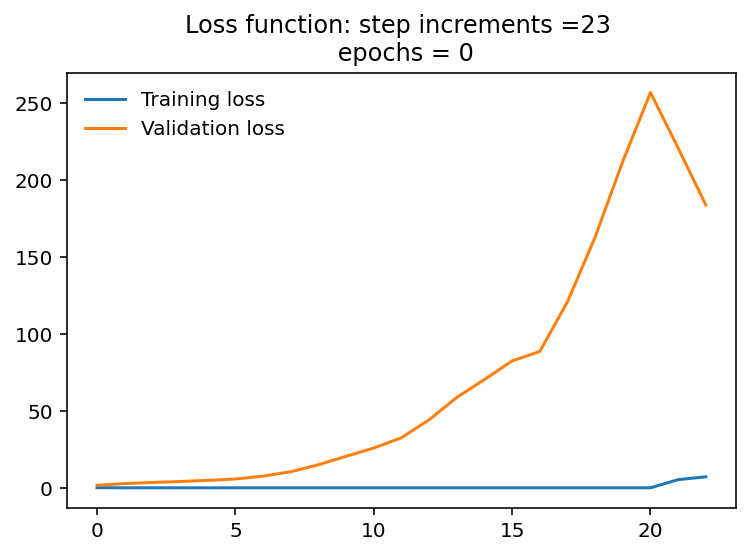

In [10]:
#epochList = [1,10,20,30,40,50,60,70,80,90,100]
epochList = [1]

for epochRange in epochList:   
    steps = 0
    running_loss = 0
    print_every = 1#10
    train_losses, test_losses = [], []

    for epoch in range(epochRange):
        for inputs, labels in trainloader:
            steps += 1
            print(steps)
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            logps = model.forward(inputs)
            loss = criterion(logps, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            #print('REACHED RUNNING LOSS')
            if steps % print_every == 0:
                #print('I am working')
                test_loss = 0
                accuracy = 0
                model.eval()
                with torch.no_grad():
                    for inputs, labels in testloader:
                        inputs, labels = inputs.to(device),labels.to(device)
                        logps = model.forward(inputs)
                        batch_loss = criterion(logps, labels)
                        test_loss += batch_loss.item()

                        ps = torch.exp(logps)
                        top_p, top_class = ps.topk(1, dim=1)
                        equals = top_class == labels.view(*top_class.shape)
                        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                train_losses.append(running_loss/len(trainloader))
                test_losses.append(test_loss/len(testloader))                    
                print(f"Epoch {epoch+1}/{epochRange}.. "
                      f"Train loss: {running_loss/print_every:.3f}.. "
                      f"Test loss: {test_loss/len(testloader):.3f}.. "
                      f"Test accuracy: {accuracy/len(testloader):.3f}")
                running_loss = 0
                model.train()
        torch.save(model, f'model_epoch_{epoch}_{stamp}.pth')
    plt.plot(train_losses, label='Training loss')
    plt.plot(test_losses, label='Validation loss')
    plt.title(f'Loss function: step increments =23 \n epochs = {epoch}')
    plt.legend(frameon=False)
    plt.imshow()
    plt.savefig(f'epoch_{epoch}-{stamp}.png')

In [15]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

trainset = trainloader
testset = testloader

classes = trainloader.dataset.classes

def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys", vmin = 180, vmax = 300)
        plt.grid(None) 
        plt.axis('off')
        
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)), vmin=180,vmax=300)
        #plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.grid(None) 
        plt.axis('off')

In [16]:
writer = SummaryWriter(f'logs/log{time.time()}')

In [17]:
trainloader.dataset

Dataset ImageFolder
    Number of datapoints: 1455
    Root location: /scratch/adomakor412/BW_train/
    StandardTransform
Transform: Compose(
               Resize(size=32, interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

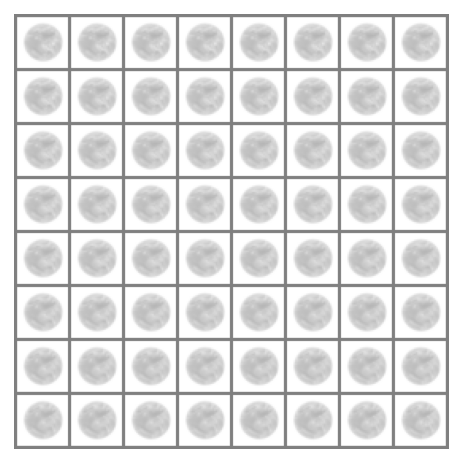

In [28]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()#runnable after training

# create grid of images
img_grid = torchvision.utils.make_grid(images)

#Must show image before saving for proper resolution
plt.imshow(img_grid.numpy().transpose(1,2,0),cmap='Greys_r')
save_image(img_grid, f'IMAGE_PRESENTATION/grid{stamp}.jpg')

# show images
matplotlib_imshow(img_grid)#, one_channel=True)

# write to tensorboard
# writer.add_image('four_fashion_mnist_images', img_grid)
# try:
#     writer.flush()
# except:
#     pass
writer.add_image(f'log/GOES_images{time.time()}', img_grid)

In [20]:
len(images)

64

In [21]:
writer.add_graph(net, images)
writer.close()

NameError: name 'net' is not defined

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # m input image channel, n output channels, rxr square convolution
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3, 32, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(32, 64, 5)
#         self.fc1 = nn.Linear(64*9*9, 1024)
#         self.fc2 = nn.Linear(1024, 7)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(x.size(0), -1)

#         #x = x.view(-1, 64)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc2(x)
#         return x


net = Net()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
x = torch.randn(batch_size, 3, 32, 32)
out = net(x)
print(out.shape)

In [ ]:
def images_to_probs(net, images):
    '''
    Generates predictions and corresponding probabilities from a trained
    network and a list of images
    '''
    output = net(images)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy())
    return preds, [F.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]

def plot_classes_preds(net, images, labels):
    '''
    Generates matplotlib Figure using a trained network, along with images
    and labels from a batch, that shows the network's top prediction along
    with its probability, alongside the actual label, coloring this
    information based on whether the prediction was correct or not.
    Uses the "images_to_probs" function.
    '''
    preds, probs = images_to_probs(net, images)
    # plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(12, 48))
    for idx in np.arange(batch_size):
        ax = fig.add_subplot(1, batch_size, idx+1, xticks=[], yticks=[])
        matplotlib_imshow(images[idx], one_channel=True)
        ax.set_title("{0}, {1:.1f}%\n(label: {2})".format(
            classes[preds[idx]],
            probs[idx] * 100.0,
            classes[labels[idx]]),
                    color=("green" if preds[idx]==labels[idx].item() else "red"))
    fig.savefig(f'epoch_{epoch}-{stamp}.png')
    return fig

In [ ]:
running_loss = 0.0
for epoch in range(1):  # loop over the dataset multiple times
    
    if len(list(enumerate(trainloader, 0))) < 10:
            print('Batch size too small (<10) for PR-curve')
            
    for i, data in enumerate(trainloader, 0):
        
        #print (data)
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 9:    # every 1000 mini-batches...
#         if i % 1000 == 999:    # every 1000 mini-batches...

            # ...log the running loss
            writer.add_scalar('training loss',
                            running_loss / 1000,
                            epoch * len(trainloader) + i)

            # ...log a Matplotlib Figure showing the model's predictions on a
            # random mini-batch
            writer.add_figure('predictions vs. actuals',
                            plot_classes_preds(net, inputs, labels),
                            global_step=epoch * len(trainloader) + i)
            print('predictions vs. actuals',
                            plot_classes_preds(net, inputs, labels),
                            global_step=epoch * len(trainloader) + i)
            running_loss = 0.0
        
print('Finished Training')

In [ ]:
# 1. gets the probability predictions in a test_size x num_classes Tensor
# 2. gets the preds in a test_size Tensor
# takes ~10 seconds to run
class_probs = []
class_preds = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        output = net(images)
        class_probs_batch = [F.softmax(el, dim=0) for el in output]
        _, class_preds_batch = torch.max(output, 1)

        class_probs.append(class_probs_batch)
        class_preds.append(class_preds_batch)

test_probs = torch.cat([torch.stack(batch) for batch in class_probs])
test_preds = torch.cat(class_preds)

# helper function
def add_pr_curve_tensorboard(class_index, test_probs, test_preds, global_step=0):
    '''
    Takes in a "class_index" from 0 to 9 and plots the corresponding
    precision-recall curve
    '''
    tensorboard_preds = test_preds == class_index
    tensorboard_probs = test_probs[:, class_index]

    writer.add_pr_curve(classes[class_index],
                        tensorboard_preds,
                        tensorboard_probs,
                        global_step=global_step)
    writer.close()

# plot all the pr curves
for i in range(len(classes)):
    add_pr_curve_tensorboard(i, test_probs, test_preds)

In [39]:
#sufficiently large pixel square side size for given number of random  set of images
#from torchvision import transforms
test_transforms = transforms.Compose([transforms.Resize(224),
                                      transforms.ToTensor(),
                                     ])

def get_random_images(num):
    data = datasets.ImageFolder(data_train_dir, transform=test_transforms)
    classes = data.classes
    indices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]
    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, 
                   sampler=sampler, batch_size=num)
    dataiter = iter(loader)
    images, labels = dataiter.next()
    return images, labels

def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = image_tensor
    input = input.to(device)#defined
    output = model(input)#defined
    index = output.data.cpu().numpy().argmax()
    return index

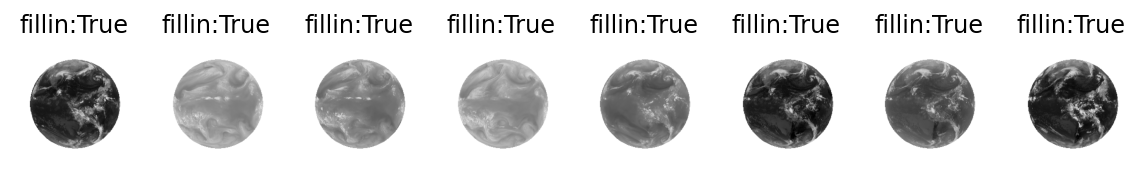

In [40]:
to_pil = transforms.ToPILImage()
images, labels = get_random_images(8)
fig=plt.figure(figsize=(10,10))
for ii in range(len(images)):
    image = to_pil(images[ii])
    index = predict_image(image)
    sub = fig.add_subplot(1, len(images), ii+1)
    res = int(labels[ii]) == index
    sub.set_title(str(classes[index]) + ":" + str(res))
    plt.axis('off')
    plt.imshow(image)
plt.show()

In [24]:
trainloader.dataset[0][0][0][10:20]==trainloader.dataset[1][0][0][10:20]##[:10]#

tensor([[ True,  True,  True,  True,  True,  True,  True,  True,  True, False,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True, False,  True,  True,  True,  True,  True,  True,
          True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True, False,  True, False, False,  True, False,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True],
        [ True,  True,  True,  True,  True,  True, False,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True, False,  True,  True,  True,  True,  

In [25]:
train_X, test_X, train_y, test_y = train_test_split(dataset[dataset.columns[0:4]].values,
                                                    dataset.species.values, test_size=0.8)

train_X = np.float32(train_X)
test_X = np.float32(test_X)
train_y = np.int64(train_y)
test_y = np.int64(test_y)

train_dataset = TensorDataset(torch.Tensor(train_X), torch.Tensor(train_y))
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

net = Net()

criterion = nn.CrossEntropyLoss()# cross entropy loss

optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

net.train()

# for epoch in range(1000):
    
#     for inputs, targets in train_loader:
#         optimizer.zero_grad()
#         out = net(inputs)
#         loss = criterion(out, targets.long())
#         loss.backward()
#         optimizer.step()

#     if epoch % 100 == 0:
#         print('number of epoch', epoch, 'loss', loss.item())

predict_out = net(torch.Tensor(test_X))
_, predict_y = torch.max(predict_out, 1)

print('prediction accuracy', accuracy_score(test_y.data, predict_y.data))

print('macro precision', precision_score(test_y.data, predict_y.data, average='macro'))
print('micro precision', precision_score(test_y.data, predict_y.data, average='micro'))
print('macro recall', recall_score(test_y.data, predict_y.data, average='macro'))
print('micro recall', recall_score(test_y.data, predict_y.data, average='micro'))

NameError: name 'dataset' is not defined